In [37]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [38]:
simout = pd.read_parquet('simulation_output_parquet.parquet')

In [39]:
# load the simulation output
simout = pd.read_parquet(os.path.join(os.getcwd(), 'simulation_output_parquet.parquet'))
simout = simout.drop(columns='mc_name')

# load the demography & extract index for spatial patches
demography = pd.read_csv(os.path.join(os.getcwd(), '../../data/interim/demography/demography_municipalities_2017.csv'))
spatial_patches = demography['NIS'].unique()

# construct an empty pd.DataFrame with desired index (date, space, state)
dates = simout['date'].unique()
value_types = simout['mc_value_type'].unique()
disease_states = simout['mc_infection_stage'].unique()
idx = pd.MultiIndex.from_product([dates, spatial_patches, disease_states],
                           names=['date', 'spatial_patch', 'disease_state'])

# values as columns
value_types = simout['mc_value_type'].unique()

# construct the 'desired' dataframe
new_simout = pd.DataFrame(index=idx, columns=value_types)

# fill in the data
for sp in spatial_patches:
    for ds in disease_states:
        for vt in value_types:
            # slice data 
            tmp = simout[((simout['mc_value_type'] == vt) & (simout['mc_infection_stage'] == ds))][str(sp)]
            # fill in data
            new_simout.loc[(slice(None), sp, ds), vt] = tmp.values

                                       incidence    prevalence
date       spatial_patch disease_state                        
2024-01-01 11001         S                   0.0       14222.0
                         I                   0.0           0.0
                         R                   0.0           0.0
           11002         S                   0.0      520504.0
                         I              0.000178           0.0
...                                          ...           ...
2024-05-01 93088         I              0.000078      0.003895
                         R              0.000714  17800.564357
           93090         S                   0.0    173.227343
                         I              0.000019      0.000924
                         R              0.000169   5581.771733

[212646 rows x 2 columns]


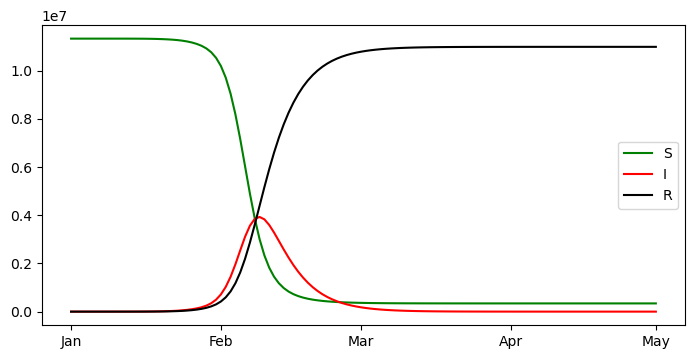

In [45]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/3))

# aggregate over spatial patches
agg = new_simout['prevalence'].groupby(by=['date', 'disease_state']).sum()

ax.plot(dates, agg.loc[(slice(None), 'S')], color='green', label='S')
ax.plot(dates, agg.loc[(slice(None), 'I')], color='red', label='I')
ax.plot(dates, agg.loc[(slice(None), 'R')], color='black', label='R')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()
plt.close()